In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

## 1/Explore TN:

In [2]:
earthquake_tn = pd.read_csv('../data/earthquake_tn_01_clean.csv')
earthquake_tn.head()

,date,latitude,longitude,depth,magnitude,news_source,latest_updated,place,seismic_type,location_error,depth_error,magnitude_error,review_status,year,month,day,time,state,city
0,2020-10-23 04:09:18.260,36.332833,-89.484667,4.93,1.65,nm,2020-10-23T16:52:09.410Z,"5 km SSW of Tiptonville, Tennessee",earthquake,0.33,0.27,0.068,reviewed,2020,10,23,04:09:18.260000,Tennessee,Tiptonville
1,2020-10-21 03:00:08.800,36.313667,-89.536167,9.50,1.23,nm,2020-10-21T13:18:24.430Z,"7 km NW of Ridgely, Tennessee",earthquake,0.68,0.51,0.032,reviewed,2020,10,21,03:00:08.800000,Tennessee,Ridgely
2,2020-10-20 18:50:21.800,36.267500,-89.523333,8.84,2.33,nm,2020-10-21T12:29:35.220Z,"3 km W of Ridgely, Tennessee",earthquake,0.15,0.30,0.142,reviewed,2020,10,20,18:50:21.800000,Tennessee,Ridgely
3,2020-10-19 20:19:38.490,36.224000,-82.817167,17.27,2.31,se,2020-10-23T06:52:55.336Z,"6 km N of Greeneville, Tennessee",earthquake,0.91,1.69,0.099,reviewed,2020,10,19,20:19:38.490000,Tennessee,Greeneville
4,2020-10-19 05:15:25.090,36.209500,-89.476167,6.33,1.59,nm,2020-10-19T13:03:45.780Z,"6 km S of Ridgely, Tennessee",earthquake,0.26,0.56,0.086,reviewed,2020,10,19,05:15:25.090000,Tennessee,Ridgely


In [3]:
earthquake_tn.shape

(4766, 19)

Question 1: There is a count of almost 5000 values for tennessee!

### 1/ Magnitudes in TN (max and mini):

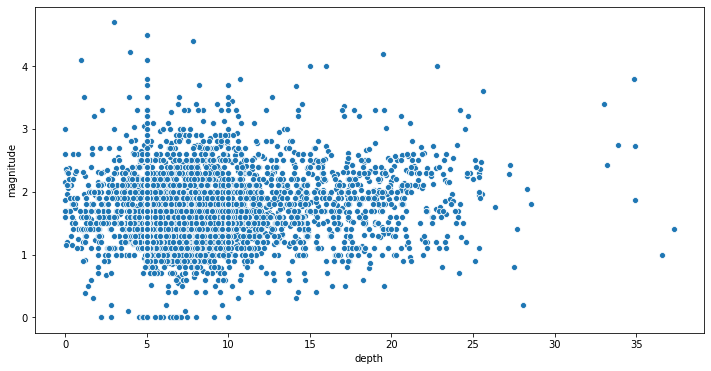

In [4]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=earthquake_tn, x="depth", y="magnitude");

In [19]:
earthquake_tn.nlargest(20, 'magnitude')

,date,latitude,longitude,depth,magnitude,news_source,latest_updated,place,seismic_type,location_error,depth_error,magnitude_error,review_status,year,month,day,time,state,city
4753,1973-11-30 07:48:41.200,35.799000,-83.962000,3.00,4.70,us,2020-07-10T19:57:44.872Z,eastern Tennessee,earthquake,NaN,NaN,NaN,reviewed,1973,11,30,07:48:41.200000,eastern Tennessee,NaN
4765,1903-11-04 18:18:00.000,36.500000,-89.500000,NaN,4.60,ushis,2018-06-04T20:43:44.000Z,Tennessee,earthquake,NaN,NaN,NaN,reviewed,1903,11,4,18:18:00,Tennessee,NaN
4762,1928-11-03 04:02:50.200,36.112000,-82.828000,5.00,4.50,ushis,2018-06-04T20:43:44.000Z,eastern Tennessee,earthquake,NaN,NaN,NaN,reviewed,1928,11,3,04:02:50.200000,eastern Tennessee,NaN
4763,1918-10-16 02:15:00.000,36.000000,-89.200000,NaN,4.50,ushis,2018-06-04T20:43:44.000Z,Tennessee,earthquake,NaN,NaN,NaN,reviewed,1918,10,16,02:15:00,Tennessee,NaN
540,2018-12-12 09:14:43.610,35.612333,-84.732000,7.87,4.40,se,2020-03-21T11:24:59.986Z,"12km NNE of Decatur, Tennessee",earthquake,0.22,0.66,NaN,reviewed,2018,12,12,09:14:43.610000,Tennessee,Decatur
4756,1962-02-02 06:43:30.000,36.374000,-89.511000,4.00,4.23,ushis,2018-06-04T20:43:45.000Z,Tennessee,earthquake,NaN,NaN,NaN,reviewed,1962,2,2,06:43:30,Tennessee,NaN
3894,1987-03-27 07:29:30.000,35.570000,-84.210000,19.50,4.20,se,2020-07-10T14:35:55.193Z,"3km SE of Vonore, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1987,3,27,07:29:30,Tennessee,Vonore
4751,1974-01-08 01:12:37.400,36.200000,-89.390000,1.00,4.10,us,2014-11-06T23:21:22.320Z,Tennessee,earthquake,NaN,NaN,NaN,reviewed,1974,1,8,01:12:37.400000,Tennessee,NaN
4758,1956-09-07 13:35:51.200,36.445000,-83.787000,5.00,4.10,ushis,2018-06-04T20:43:44.000Z,eastern Tennessee,earthquake,NaN,NaN,NaN,reviewed,1956,9,7,13:35:51.200000,eastern Tennessee,NaN
4764,1913-03-28 21:50:00.000,36.200000,-83.700000,NaN,4.10,ushis,2018-06-04T20:43:44.000Z,eastern Tennessee,earthquake,NaN,NaN,NaN,reviewed,1913,3,28,21:50:00,eastern Tennessee,NaN


The highest magnitude recorded is 4.70

In [6]:
earthquake_tn.nsmallest(10, 'magnitude')

,date,latitude,longitude,depth,magnitude,news_source,latest_updated,place,seismic_type,location_error,depth_error,magnitude_error,review_status,year,month,day,time,state,city
3655,1991-04-12 20:47:26.800,36.358,-89.569,2.2,0.0,nm,2016-04-14T18:54:51.400Z,"8km WSW of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1991,4,12,20:47:26.800000,Tennessee,Tiptonville
3793,1989-01-28 09:55:49.200,36.200,-89.460,5.0,0.0,nm,2016-04-14T18:12:58.650Z,"7km SSE of Ridgely, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1989,1,28,09:55:49.200000,Tennessee,Ridgely
3795,1989-01-20 13:37:49.300,36.270,-89.520,9.1,0.0,nm,2016-04-14T18:12:40.390Z,"2km WNW of Ridgely, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1989,1,20,13:37:49.300000,Tennessee,Ridgely
3806,1988-10-12 13:12:37.900,36.230,-89.540,10.0,0.0,nm,2016-04-14T18:08:37.250Z,"5km SW of Ridgely, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1988,10,12,13:12:37.900000,Tennessee,Ridgely
3807,1988-10-07 04:24:05.300,36.400,-89.530,7.0,0.0,nm,2016-04-14T18:08:25.090Z,"5km WNW of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1988,10,7,04:24:05.300000,Tennessee,Tiptonville
4147,1983-08-28 22:44:21.700,36.570,-84.530,5.0,0.0,se,2016-04-14T19:18:46.310Z,"8km N of Oneida, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1983,8,28,22:44:21.700000,Tennessee,Oneida
4179,1983-02-05 01:10:20.200,35.710,-89.660,5.0,0.0,nm,2016-04-14T15:40:58.170Z,"12km WSW of Ripley, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1983,2,5,01:10:20.200000,Tennessee,Ripley
4267,1981-09-01 13:50:53.100,36.430,-89.540,4.5,0.0,nm,2016-04-14T15:07:25.970Z,"8km NW of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1981,9,1,13:50:53.100000,Tennessee,Tiptonville
4268,1981-08-31 01:27:40.100,36.470,-89.480,4.7,0.0,nm,2016-04-14T15:07:01.670Z,"10km N of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1981,8,31,01:27:40.100000,Tennessee,Tiptonville
4269,1981-08-30 05:06:40.300,36.470,-89.550,6.0,0.0,nm,2016-04-14T15:06:55.590Z,"12km NW of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,reviewed,1981,8,30,05:06:40.300000,Tennessee,Tiptonville


I'm confused... How a magnitude of 0 can have a depth of 10 km????

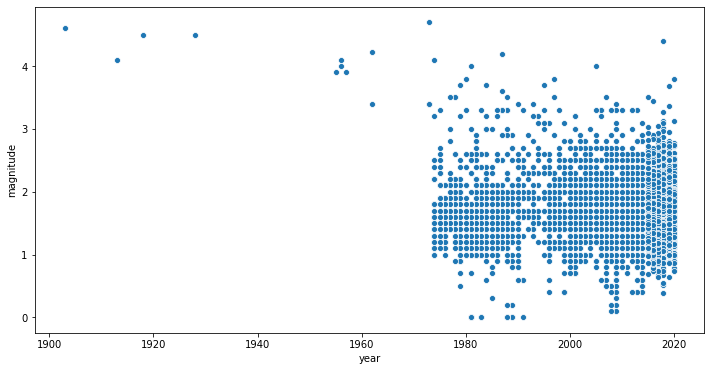

In [7]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=earthquake_tn, x="year", y="magnitude");

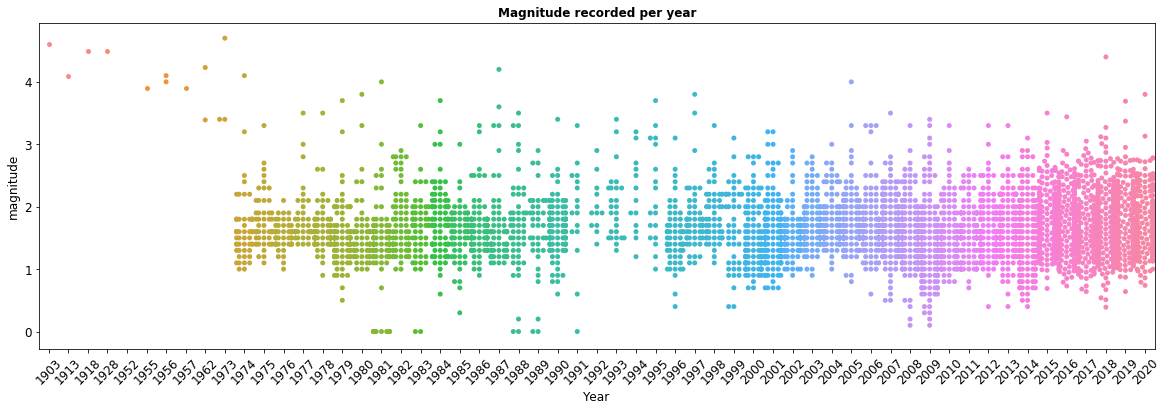

In [17]:
fontsize = 12

plt.subplots(figsize = (20, 6))
sns.swarmplot(data = earthquake_tn, x = 'year', y = 'magnitude')
plt.xticks(rotation = 45)
plt.xticks(fontsize = fontsize)
plt.xlabel('Year', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('magnitude', fontsize = fontsize)
plt.title('Magnitude recorded per year', fontsize = fontsize, fontweight = 'bold');

Interesting fact: the methodes of detections got more sensitive after the 70's

### 2/ Depth related to earthquakes in TN:

You get more data over time: Max depth is over 35 kms

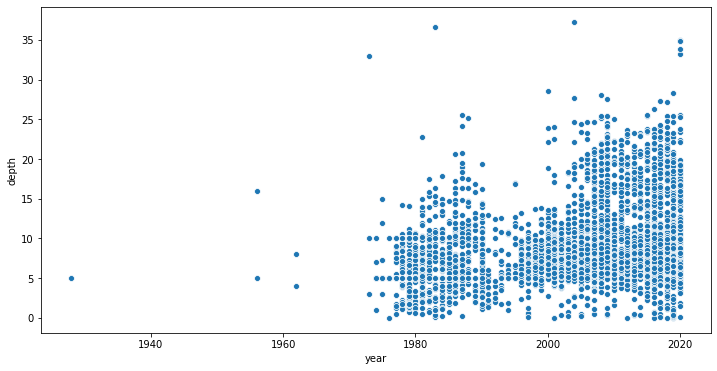

In [8]:
plt.figure(figsize = (12,6))
sns.scatterplot(data=earthquake_tn, x="year", y="depth");

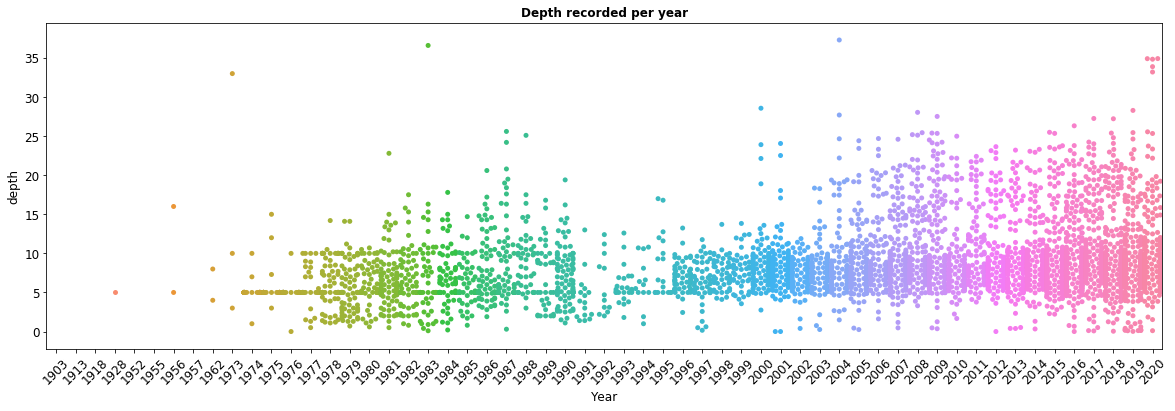

In [18]:
fontsize = 12

plt.subplots(figsize = (20, 6))
sns.swarmplot(data = earthquake_tn, x = 'year', y = 'depth')
plt.xticks(rotation = 45)
plt.xticks(fontsize = fontsize)
plt.xlabel('Year', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('depth', fontsize = fontsize)
plt.title('Depth recorded per year', fontsize = fontsize, fontweight = 'bold');

## 2/ Adding population to TN:

I got a csv file with all the cities of the USA:

In [9]:
us_pop = pd.read_csv('../data/uscities.csv')
us_pop.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220.0,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807.0,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203.0,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545.0,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938.0,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


I only want Tennessee:

In [10]:
tn_pop = us_pop[us_pop.state_id == 'TN']
tn_pop.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
44,Nashville,Nashville,TN,Tennessee,47037,Davidson,36.1715,-86.7843,1081903.0,544.0,polygon,False,True,America/Chicago,1,37027 37138 37076 37072 37205 37201 37206 3724...,1840072294
46,Memphis,Memphis,TN,Tennessee,47157,Shelby,35.1046,-89.9773,1066967.0,792.0,polygon,False,True,America/Chicago,1,38120 38127 38107 38106 38105 38104 38103 3810...,1840015457
76,Knoxville,Knoxville,TN,Tennessee,47093,Knox,35.9692,-83.9496,586048.0,733.0,polygon,False,True,America/New_York,2,37918 37912 37909 37902 37924 37920 37921 3792...,1840014486
106,Chattanooga,Chattanooga,TN,Tennessee,47065,Hamilton,35.0657,-85.2488,415501.0,493.0,polygon,False,True,America/New_York,2,37415 37416 37410 37411 37419 37409 37421 3736...,1840014569
237,Clarksville,Clarksville,TN,Tennessee,47125,Montgomery,36.5695,-87.3420,188746.0,618.0,polygon,False,True,America/Chicago,2,42223 37043 37042 37040 37044,1840014421


In [11]:
# cleaning the dataframe
tn_pop = (tn_pop
          .drop(columns = ['city_ascii','state_id','county_fips', 'military', 'incorporated', 'timezone', 'ranking', 'id'])
          .rename(columns = {'state_name': 'state','lat': 'latitude', 'lng': 'longitude'})
         )

tn_pop.head()

,city,state,county_name,latitude,longitude,population,density,source,zips
44,Nashville,Tennessee,Davidson,36.1715,-86.7843,1081903.0,544.0,polygon,37027 37138 37076 37072 37205 37201 37206 3724...
46,Memphis,Tennessee,Shelby,35.1046,-89.9773,1066967.0,792.0,polygon,38120 38127 38107 38106 38105 38104 38103 3810...
76,Knoxville,Tennessee,Knox,35.9692,-83.9496,586048.0,733.0,polygon,37918 37912 37909 37902 37924 37920 37921 3792...
106,Chattanooga,Tennessee,Hamilton,35.0657,-85.2488,415501.0,493.0,polygon,37415 37416 37410 37411 37419 37409 37421 3736...
237,Clarksville,Tennessee,Montgomery,36.5695,-87.3420,188746.0,618.0,polygon,42223 37043 37042 37040 37044


In [10]:
# Export
tn_pop.to_csv('../data/tn_pop_clean.csv', index = False)

## 3/ Looking at population and magnitudes in tennessee:

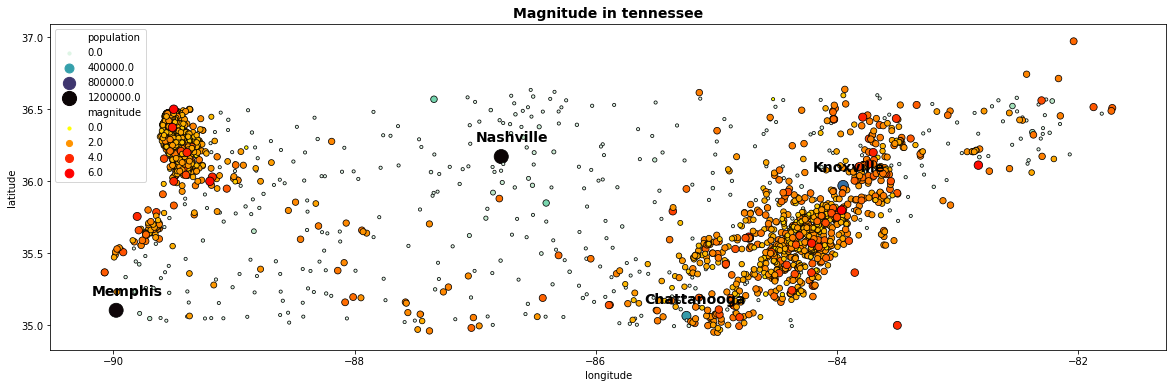

In [34]:
plt.figure(figsize = (20,6))

sns.scatterplot(data=tn_pop, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_tn, x="longitude", y="latitude", hue="magnitude",palette="autumn_r", size="magnitude", sizes=(10, 75), edgecolor = 'black')

plt.annotate(s = 'Nashville', xy = (-86.7843, 36.1715), fontsize = 14, fontweight = 'bold',
             xytext = (-86.999, 36.28))
plt.annotate(s = 'Memphis', xy = (-89.9773, 35.1046), fontsize = 14, fontweight = 'bold',
             xytext = (-90.1773, 35.2046))
plt.annotate(s = 'Knoxville', xy = (-83.9496, 35.9692), fontsize = 14, fontweight = 'bold',
             xytext = (-84.2, 36.065))
plt.annotate(s = 'Chattanooga', xy = (-85.2488, 35.0657), fontsize = 14, fontweight = 'bold',
             xytext = (-85.6, 35.15))
plt.title('Magnitude in tennessee', fontsize = 14, fontweight = 'bold');

Nashville is safe in the middle for magnitudes. Memphis is more at risk but not in the center of earthquakes. However it's more risky for Chattanooga and Knoxville where there is a lot of earthquake activity!

## 4/ Population and depths in TN:

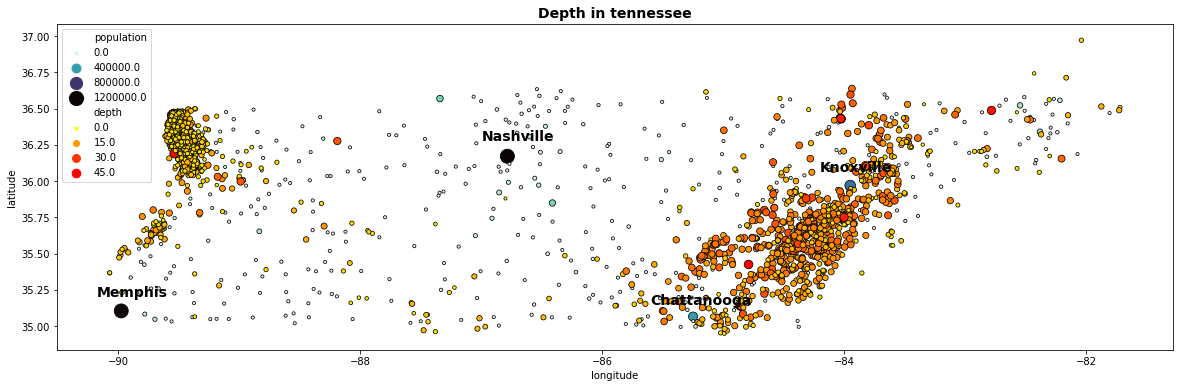

In [33]:
plt.figure(figsize = (20,6))

sns.scatterplot(data=tn_pop, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_tn, x="longitude", y="latitude", hue="depth",palette="autumn_r", size="depth", sizes=(10, 75), edgecolor = 'black')

plt.annotate(s = 'Nashville', xy = (-86.7843, 36.1715), fontsize = 14, fontweight = 'bold',
             xytext = (-86.999, 36.28))
plt.annotate(s = 'Memphis', xy = (-89.9773, 35.1046), fontsize = 14, fontweight = 'bold',
             xytext = (-90.1773, 35.2046))
plt.annotate(s = 'Knoxville', xy = (-83.9496, 35.9692), fontsize = 14, fontweight = 'bold',
             xytext = (-84.2, 36.065))
plt.annotate(s = 'Chattanooga', xy = (-85.2488, 35.0657), fontsize = 14, fontweight = 'bold',
             xytext = (-85.6, 35.15))
plt.title('Depth in tennessee', fontsize = 14, fontweight = 'bold');

## 5/ Magnitudes over the years:

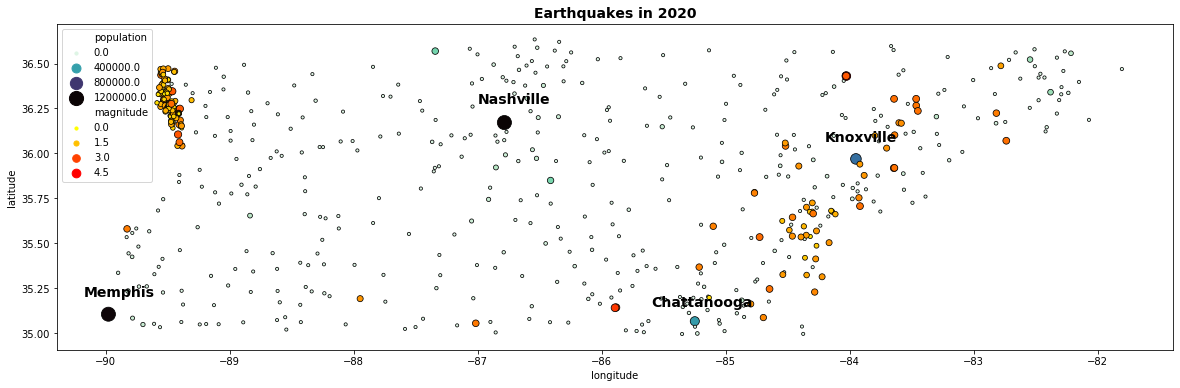

In [35]:
plt.figure(figsize = (20,6))

sns.scatterplot(data=tn_pop, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_tn[(earthquake_tn.year == 2020)], x="longitude", y="latitude", hue="magnitude",palette="autumn_r", size="magnitude", sizes=(10, 75), edgecolor = 'black')

plt.annotate(s = 'Nashville', xy = (-86.7843, 36.1715), fontsize = 14, fontweight = 'bold',
             xytext = (-86.999, 36.28))
plt.annotate(s = 'Memphis', xy = (-89.9773, 35.1046), fontsize = 14, fontweight = 'bold',
             xytext = (-90.1773, 35.2046))
plt.annotate(s = 'Knoxville', xy = (-83.9496, 35.9692), fontsize = 14, fontweight = 'bold',
             xytext = (-84.2, 36.065))
plt.annotate(s = 'Chattanooga', xy = (-85.2488, 35.0657), fontsize = 14, fontweight = 'bold',
             xytext = (-85.6, 35.15))
plt.title('Earthquakes in 2020', fontsize = 14, fontweight = 'bold');

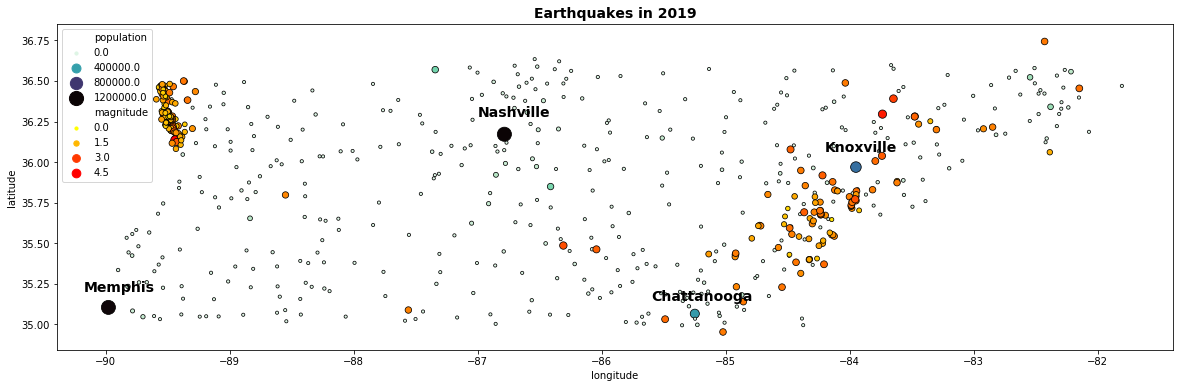

In [36]:
plt.figure(figsize = (20,6))

sns.scatterplot(data=tn_pop, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_tn[(earthquake_tn.year == 2019)], x="longitude", y="latitude", hue="magnitude",palette="autumn_r", size="magnitude", sizes=(10, 75), edgecolor = 'black')

plt.annotate(s = 'Nashville', xy = (-86.7843, 36.1715), fontsize = 14, fontweight = 'bold',
             xytext = (-86.999, 36.28))
plt.annotate(s = 'Memphis', xy = (-89.9773, 35.1046), fontsize = 14, fontweight = 'bold',
             xytext = (-90.1773, 35.2046))
plt.annotate(s = 'Knoxville', xy = (-83.9496, 35.9692), fontsize = 14, fontweight = 'bold',
             xytext = (-84.2, 36.065))
plt.annotate(s = 'Chattanooga', xy = (-85.2488, 35.0657), fontsize = 14, fontweight = 'bold',
             xytext = (-85.6, 35.15))
plt.title('Earthquakes in 2019', fontsize = 14, fontweight = 'bold');

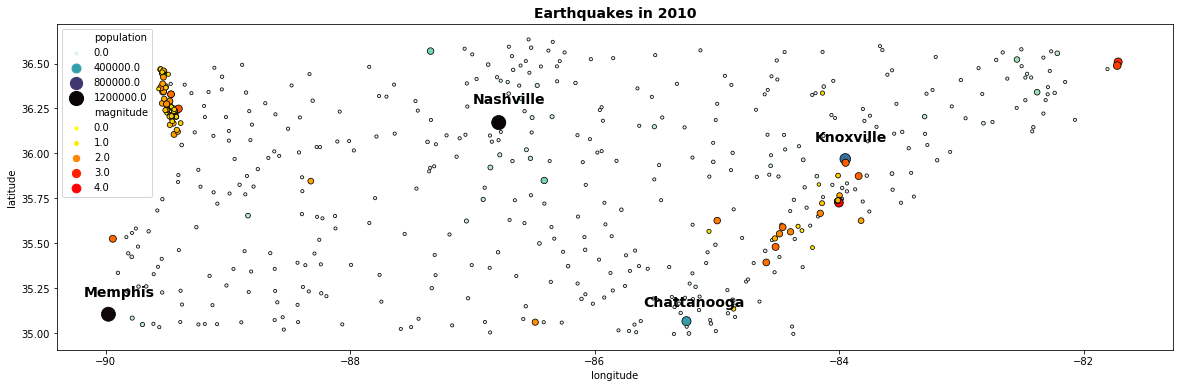

In [37]:
plt.figure(figsize = (20,6))

sns.scatterplot(data=tn_pop, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_tn[(earthquake_tn.year == 2010)], x="longitude", y="latitude", hue="magnitude",palette="autumn_r", size="magnitude", sizes=(10, 75), edgecolor = 'black')

plt.annotate(s = 'Nashville', xy = (-86.7843, 36.1715), fontsize = 14, fontweight = 'bold',
             xytext = (-86.999, 36.28))
plt.annotate(s = 'Memphis', xy = (-89.9773, 35.1046), fontsize = 14, fontweight = 'bold',
             xytext = (-90.1773, 35.2046))
plt.annotate(s = 'Knoxville', xy = (-83.9496, 35.9692), fontsize = 14, fontweight = 'bold',
             xytext = (-84.2, 36.065))
plt.annotate(s = 'Chattanooga', xy = (-85.2488, 35.0657), fontsize = 14, fontweight = 'bold',
             xytext = (-85.6, 35.15))
plt.title('Earthquakes in 2010', fontsize = 14, fontweight = 'bold');

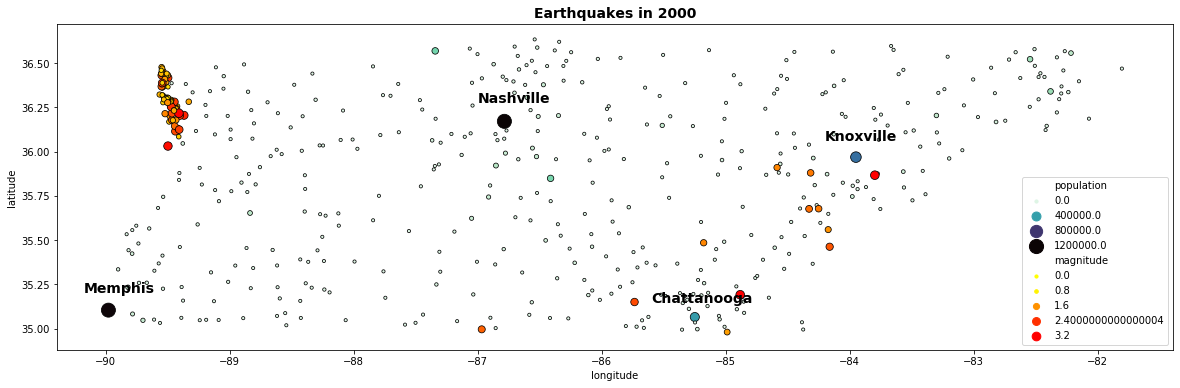

In [38]:
plt.figure(figsize = (20,6))

sns.scatterplot(data=tn_pop, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_tn[(earthquake_tn.year == 2000)], x="longitude", y="latitude", hue="magnitude",palette="autumn_r", size="magnitude", sizes=(10, 75), edgecolor = 'black')

plt.annotate(s = 'Nashville', xy = (-86.7843, 36.1715), fontsize = 14, fontweight = 'bold',
             xytext = (-86.999, 36.28))
plt.annotate(s = 'Memphis', xy = (-89.9773, 35.1046), fontsize = 14, fontweight = 'bold',
             xytext = (-90.1773, 35.2046))
plt.annotate(s = 'Knoxville', xy = (-83.9496, 35.9692), fontsize = 14, fontweight = 'bold',
             xytext = (-84.2, 36.065))
plt.annotate(s = 'Chattanooga', xy = (-85.2488, 35.0657), fontsize = 14, fontweight = 'bold',
             xytext = (-85.6, 35.15))
plt.title('Earthquakes in 2000', fontsize = 14, fontweight = 'bold');

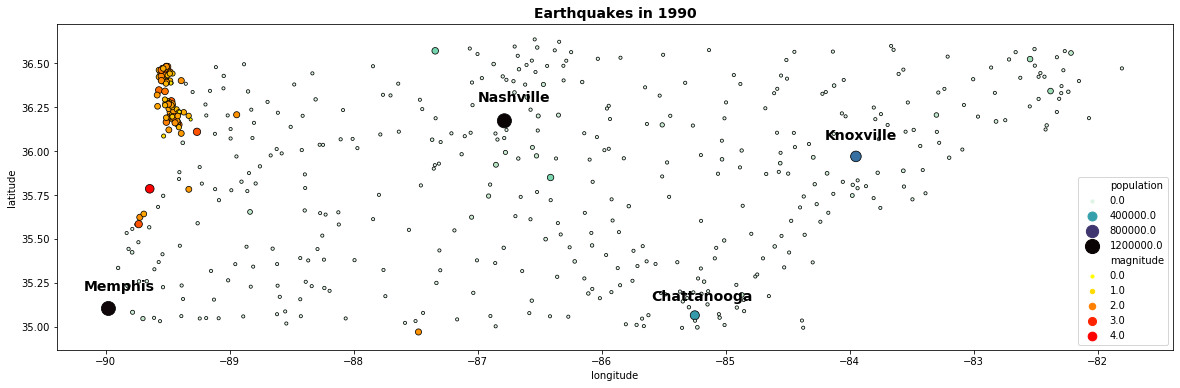

In [39]:
plt.figure(figsize = (20,6))

sns.scatterplot(data=tn_pop, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_tn[(earthquake_tn.year == 1990)], x="longitude", y="latitude", hue="magnitude",palette="autumn_r", size="magnitude", sizes=(10, 75), edgecolor = 'black')

plt.annotate(s = 'Nashville', xy = (-86.7843, 36.1715), fontsize = 14, fontweight = 'bold',
             xytext = (-86.999, 36.28))
plt.annotate(s = 'Memphis', xy = (-89.9773, 35.1046), fontsize = 14, fontweight = 'bold',
             xytext = (-90.1773, 35.2046))
plt.annotate(s = 'Knoxville', xy = (-83.9496, 35.9692), fontsize = 14, fontweight = 'bold',
             xytext = (-84.2, 36.065))
plt.annotate(s = 'Chattanooga', xy = (-85.2488, 35.0657), fontsize = 14, fontweight = 'bold',
             xytext = (-85.6, 35.15))
plt.title('Earthquakes in 1990', fontsize = 14, fontweight = 'bold');

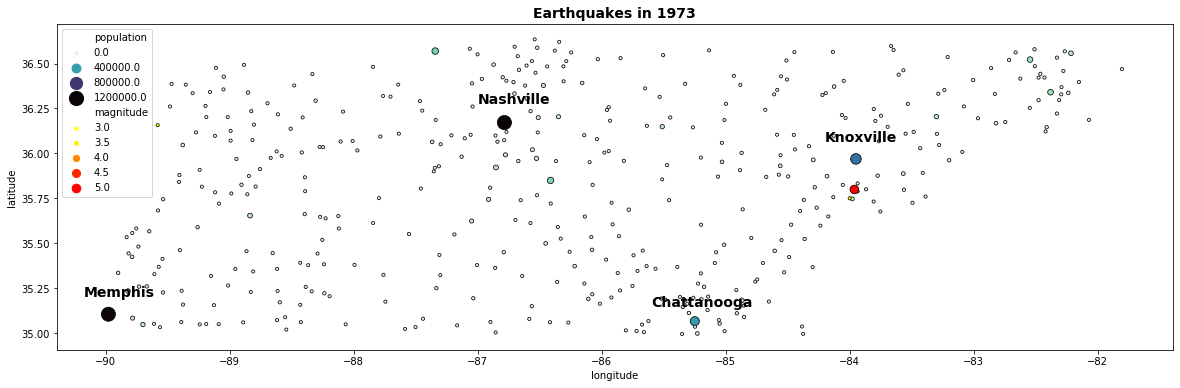

In [49]:
plt.figure(figsize = (20,6))

sns.scatterplot(data=tn_pop, x="longitude", y="latitude", hue="population", palette="mako_r", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_tn[(earthquake_tn.year == 1973)], x="longitude", y="latitude", hue="magnitude",palette="autumn_r", size="magnitude", sizes=(10, 75), edgecolor = 'black')

plt.annotate(s = 'Nashville', xy = (-86.7843, 36.1715), fontsize = 14, fontweight = 'bold',
             xytext = (-86.999, 36.28))
plt.annotate(s = 'Memphis', xy = (-89.9773, 35.1046), fontsize = 14, fontweight = 'bold',
             xytext = (-90.1773, 35.2046))
plt.annotate(s = 'Knoxville', xy = (-83.9496, 35.9692), fontsize = 14, fontweight = 'bold',
             xytext = (-84.2, 36.065))
plt.annotate(s = 'Chattanooga', xy = (-85.2488, 35.0657), fontsize = 14, fontweight = 'bold',
             xytext = (-85.6, 35.15))
plt.title('Earthquakes in 1973', fontsize = 14, fontweight = 'bold');

Analysis quakes before 1973 is complicated because there is not enough data.